# Задача классификации лидов (потенциальных покупателей)

## Информация

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating, etc. ) in order to get a higher lead conversion.

X Education wants to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score h have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Признаки

* Prospect ID - A unique ID with which the customer is identified.
* Lead Number - A lead number assigned to each lead procured.
* Lead Origin - The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
* Lead Source - The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
* Do Not Email -An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
* Do Not Call - An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
* Converted - The target variable. Indicates whether a lead has been successfully converted or not.
* TotalVisits - The total number of visits made by the customer on the website.
* Total Time Spent on Website - The total time spent by the customer on the website.
* Page Views Per Visit - Average number of pages on the website viewed during the visits.
* Last Activity - Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
* Country - The country of the customer.
* Specialization - The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
* How did you hear about X Education - The source from which the customer heard about X Education.
* What is your current occupation - Indicates whether the customer is a student, umemployed or employed.
* What matters most to you in choosing this course An option selected by the customer - indicating what is their main motto behind doing this course.
* Search - Indicating whether the customer had seen the ad in any of the listed items.
* Magazine
* Newspaper Article
* X Education Forums
* Newspaper
* Digital Advertisement
* Through Recommendations - Indicates whether the customer came in through recommendations.
* Receive More Updates About Our Courses - Indicates whether the customer chose to receive more updates about the courses.
* Tags - Tags assigned to customers indicating the current status of the lead.
* Lead Quality - Indicates the quality of lead based on the data and intuition the employee who has been assigned to the lead.
* Update me on Supply Chain Content - Indicates whether the customer wants updates on the Supply Chain Content.
* Get updates on DM Content - Indicates whether the customer wants updates on the DM Content.
* Lead Profile - A lead level assigned to each customer based on their profile.
* City - The city of the customer.
* Asymmetric Activity Index - An index and score assigned to each customer based on their activity and their profile
* Asymmetric Profile Index
* Asymmetric Activity Score
* Asymmetric Profile Score
* I agree to pay the amount through cheque - Indicates whether the customer has agreed to pay the amount through cheque or not.
* a free copy of Mastering The Interview - Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
* Last Notable Activity - The last notable activity performed by the student.


## Ссылки
* https://www.kaggle.com/amritachatterjee09/lead-scoring-dataset


## Импорт библиотек

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import warnings
warnings.filterwarnings('ignore') # Игнор ворнингов
import matplotlib.pyplot as plt # Научная графика
from matplotlib.pyplot import xticks
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных

# Алгоритмы машинного обучения
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
pd.set_option('display.max_columns', None)

## Загружаем и проверяем данные

In [2]:
data = pd.read_csv('lead_scoring.csv')

Посмотрим на размеры таблицы:

In [3]:
data.shape

(9240, 37)

Первые пять строк таблицы:

In [4]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Последние пять строк таблицы:

In [5]:
data.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


Имеем следующие имена столбцов (признаков):

In [6]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Обработка данных

Посмотрим, есть ли в таблице повторяющиеся `Prospect ID`

In [9]:
sum(data.duplicated(subset='Prospect ID')) == 0

True

Следовательно, повторов нет.

Как можно заметить, в данных имеются значения `Select`, которые попросту означают, что пользователь не выбрал никакой ответ при заполнении формы. Заменяем `Select` на `np.nan`

In [10]:
data = data.replace('Select', np.nan)

Посмотрим сколько пропущенных значений имеется в каждом столбце (в процентном соотношении):

In [11]:
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

Более 45% лидов имеют пропущенные значения в таких признаках, как `Lead Quality`, `Asymmetrique Profile Score`, `Asymmetrique Activity Score`, `Asymmetrique Profile Index`, `Asymmetrique Activity Index`. К тому же, данные признаки заполнялись работниками компании `Education X`, что может говорить о субъективности данных. Данные столбцы нужно удалить.

In [12]:
data.drop(['Lead Quality',
           'Asymmetrique Profile Score',
           'Asymmetrique Activity Score',
           'Asymmetrique Profile Index',
           'Asymmetrique Activity Index'], axis=1, inplace=True)

In [13]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,NaN,Mumbai,No,No,Modified


Посмотрим, есть ли строки без целевой переменной

In [14]:
data['Converted'].isnull().sum()

0

Таких строк нет.

Ещё раз посмотрим на пропущенные значения. Уберем `How did you hear about X Education` и `Lead Profile` ввиду большого количества пропущенных значений.

In [15]:
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Lead Origin                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Lead Number                                       0.00
Do Not Call                                       0.00
Last Notab

In [16]:
data.drop(['Lead Profile', 'How did you hear about X Education'], axis=1, inplace=True)

In [17]:
data.drop(['Do Not Call'], axis=1, inplace=True)

Заполняем пустые значения в признаке `Country`

In [18]:
data.Country.value_counts(dropna=False, normalize=True)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Canada                  0.000433
Germany                 0.000433
South Africa            0.000433
Kuwait                  0.000433
Nigeria                 0.000433
Sweden                  0.000325
Philippines             0.000216
China                   0.000216
Netherlands             0.000216
Uganda                  0.000216
Italy                   0.000216
Belgium                 0.000216
Asia/Pacific Region     0.000216
Ghana                   0.000216
Bangladesh              0.000216
Liberia                 0.000108
Denmark   

Так как 70% лидов поступают из Индии, можно предположить, что строки с `NaN` также относятся к Индии.

In [19]:
data['Country'].fillna('India', inplace=True)

In [20]:
data.Specialization.value_counts(dropna=False, normalize=True)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

Присвоим значение `Other` к строчкам с `NaN`

In [21]:
data['Specialization'].fillna('Other', inplace=True)

In [22]:
data.City.value_counts(dropna=False, normalize=True)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

Присвоим `Mumbai` к строкам, где указана Индия как страна

In [23]:
condition_india = data['Country'] == 'India'
condition = (data['City'].isnull()) & condition_india
data.loc[condition,'City'] = 'Mumbai'

In [24]:
data.City.value_counts(dropna=False)

Mumbai                         6831
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
NaN                              60
Name: City, dtype: int64

In [25]:
data['What is your current occupation'].value_counts(dropna=False, normalize=True)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

Заменим `NaN` на `Other`

In [26]:
data['What is your current occupation'].fillna('Other', inplace=True)

In [27]:
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False)

Tags                                             36.29
What matters most to you in choosing a course    29.32
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
City                                              0.65
Lead Source                                       0.39
Last Notable Activity                             0.00
What is your current occupation                   0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Country                                           0.00
Specialization                                    0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Magazine  

In [28]:
data['Tags'].value_counts(dropna=False, normalize=True)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

Заменим `NaN` на `Will revert after reading the email`

In [29]:
data['Tags'].fillna('Will revert after reading the email', inplace=True)

In [30]:
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
City                                              0.65
Lead Source                                       0.39
Last Notable Activity                             0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Magazine                                          0.00
Newspaper 

In [31]:
data.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

Заменим `NaN` на `Better Career Prospects`

In [32]:
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
City                                        0.65
Lead Source                                 0.39
Last Notable Activity                       0.00
What is your current occupation             0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Do Not Email                                0.00
Converted                                   0.00
Total Time Spent on Website                 0.00
Country                                     0.00
Specialization                              0.00
Search                                      0.00
A free copy of Mastering The Interview      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisemen

In [33]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

Остальные строки с пустыми значениями удалим из датасета

In [34]:
data.dropna(inplace = True)

In [35]:
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False)

Last Notable Activity                       0.0
A free copy of Mastering The Interview      0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Уберем бесполезные признаки

In [36]:
data.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

## Бинаризация номинальных признаков

In [37]:
data['Lead Origin'].value_counts(dropna=False, normalize=True)

Landing Page Submission    0.540271
API                        0.391946
Lead Add Form              0.064455
Lead Import                0.003328
Name: Lead Origin, dtype: float64

In [38]:
lead_origin_dummies = pd.get_dummies(data['Lead Origin'])

In [39]:
lead_origin_dummies.head()

,API,Landing Page Submission,Lead Add Form,Lead Import
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [40]:
data = pd.concat((data, lead_origin_dummies), axis=1)
data = data.drop(['Lead Origin'], axis=1)
data['Lead Source'].value_counts(dropna=False, normalize=True)

Google              0.316951
Direct Traffic      0.280453
Olark Chat          0.194475
Organic Search      0.125471
Reference           0.049146
Welingak Website    0.014311
Referral Sites      0.013313
Facebook            0.003439
Others              0.002441
Name: Lead Source, dtype: float64

In [41]:
lead_source_dummies = pd.get_dummies(data['Lead Source'])
data = pd.concat((data, lead_source_dummies), axis=1)
data = data.drop(['Lead Source'], axis=1)

In [42]:
specialization_dummies = pd.get_dummies(data['Specialization'])
data = pd.concat((data, specialization_dummies), axis=1)
data = data.drop(['Specialization'], axis=1)

In [43]:
country_dummies = pd.get_dummies(data['Country'])
data = pd.concat((data, country_dummies), axis=1)
data = data.drop(['Country'], axis=1)

In [44]:
city_dummies = pd.get_dummies(data['City'])
data = pd.concat((data, city_dummies), axis=1)
data = data.drop(['City'], axis=1)

In [45]:
# data['Tags'].value_counts(dropna=False, normalize=True)
tags_dummies = pd.get_dummies(data['Tags'])
data = pd.concat((data, tags_dummies), axis=1)
data = data.drop(['Tags'], axis=1)

In [46]:
last_activity_dummies = pd.get_dummies(data['Last Activity'])
data = pd.concat((data, last_activity_dummies), axis=1)
data = data.drop(['Last Activity'], axis=1)

In [47]:
# data['Last Notable Activity'].value_counts(dropna=False, normalize=True)
last_notable_activity_dummies = pd.get_dummies(data['Last Notable Activity'])
data = pd.concat((data, last_notable_activity_dummies), axis=1)
data = data.drop(['Last Notable Activity'], axis=1)

In [48]:
occupation_dummies = pd.get_dummies(data['What is your current occupation'])
data = pd.concat((data, occupation_dummies), axis=1)
data = data.drop(['What is your current occupation'], axis=1)

In [49]:
data['Do Not Email'] = pd.factorize(data['Do Not Email'])[0]
data['Search'] = pd.factorize(data['Search'])[0]
data['Magazine'] = pd.factorize(data['Magazine'])[0]
data['Newspaper Article'] = pd.factorize(data['Newspaper Article'])[0]
data['X Education Forums'] = pd.factorize(data['X Education Forums'])[0]
data['Newspaper'] = pd.factorize(data['Newspaper'])[0]
data['Digital Advertisement'] = pd.factorize(data['Digital Advertisement'])[0]
data['Through Recommendations'] = pd.factorize(data['Through Recommendations'])[0]
data['Receive More Updates About Our Courses'] = pd.factorize(data['Receive More Updates About Our Courses'])[0]
data['Update me on Supply Chain Content'] = pd.factorize(data['Update me on Supply Chain Content'])[0]
data['Get updates on DM Content'] = pd.factorize(data['Get updates on DM Content'])[0]
data['I agree to pay the amount through cheque'] = pd.factorize(data['I agree to pay the amount through cheque'])[0]
data['A free copy of Mastering The Interview'] = pd.factorize(data['A free copy of Mastering The Interview'])[0]
data['Converted'] = pd.factorize(data['Converted'])[0]

In [50]:
data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Lead Import,Direct Traffic,Facebook,Google,Olark Chat,Organic Search,Others,Reference,Referral Sites,Welingak Website,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Other,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Australia,Bahrain,Bangladesh,Belgium,Canada,China,Denmark,France,Germany,Ghana,Hong Kong,India,Indonesia,Italy,Kenya,Kuwait,Liberia,Malaysia,Netherlands,Nigeria,Oman,Philippines,Qatar,Saudi Arabia,Singapore,South Africa,Sweden,Switzerland,Tanzania,Uganda,United Arab Emirates,United Kingdom,United States,Vietnam,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,Already a student,Busy,Closed by Horizzon,Diploma holder (Not Eligible),Graduation in progress,In confusion whether part time or DLP,Interested in full time MBA,Interested in Next batch,Interested in other courses,Lateral student,Lost to EINS,Lost to Others,Not doing further education,Recognition issue (DEC approval),Ringing,Shall take in the next coming month,Still Thinking,University not recognized,Want to take admission but has financial problems,Will revert after reading the email,in touch with EINS,invalid number,number not provided,opp hangup,switched off,wrong number given,Approached upfront,Converted to Lead,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Visited Booth in Tradeshow,Approached upfront,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Businessman,Housewife,Other,Student,Unemployed,Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

## KNN

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = data.drop(['Converted'], axis=1)

In [66]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Lead Import,Direct Traffic,Facebook,Google,Olark Chat,Organic Search,Others,Reference,Referral Sites,Welingak Website,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Other,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Australia,Bahrain,Bangladesh,Belgium,Canada,China,Denmark,France,Germany,Ghana,Hong Kong,India,Indonesia,Italy,Kenya,Kuwait,Liberia,Malaysia,Netherlands,Nigeria,Oman,Philippines,Qatar,Saudi Arabia,Singapore,South Africa,Sweden,Switzerland,Tanzania,Uganda,United Arab Emirates,United Kingdom,United States,Vietnam,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,Already a student,Busy,Closed by Horizzon,Diploma holder (Not Eligible),Graduation in progress,In confusion whether part time or DLP,Interested in full time MBA,Interested in Next batch,Interested in other courses,Lateral student,Lost to EINS,Lost to Others,Not doing further education,Recognition issue (DEC approval),Ringing,Shall take in the next coming month,Still Thinking,University not recognized,Want to take admission but has financial problems,Will revert after reading the email,in touch with EINS,invalid number,number not provided,opp hangup,switched off,wrong number given,Approached upfront,Converted to Lead,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Visited Booth in Tradeshow,Approached upfront,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Businessman,Housewife,Other,Student,Unemployed,Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [67]:
y = data['Converted']

In [68]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Скейлинг

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[:] = scaler.fit_transform(X_train[:])

In [71]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Lead Import,Direct Traffic,Facebook,Google,Olark Chat,Organic Search,Others,Reference,Referral Sites,Welingak Website,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Other,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Australia,Bahrain,Bangladesh,Belgium,Canada,China,Denmark,France,Germany,Ghana,Hong Kong,India,Indonesia,Italy,Kenya,Kuwait,Liberia,Malaysia,Netherlands,Nigeria,Oman,Philippines,Qatar,Saudi Arabia,Singapore,South Africa,Sweden,Switzerland,Tanzania,Uganda,United Arab Emirates,United Kingdom,United States,Vietnam,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,Already a student,Busy,Closed by Horizzon,Diploma holder (Not Eligible),Graduation in progress,In confusion whether part time or DLP,Interested in full time MBA,Interested in Next batch,Interested in other courses,Lateral student,Lost to EINS,Lost to Others,Not doing further education,Recognition issue (DEC approval),Ringing,Shall take in the next coming month,Still Thinking,University not recognized,Want to take admission but has financial problems,Will revert after reading the email,in touch with EINS,invalid number,number not provided,opp hangup,switched off,wrong number given,Approached upfront,Converted to Lead,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Visited Booth in Tradeshow,Approached upfront,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Businessman,Housewife,Other,Student,Unemployed,Working Professional
4948,-0.297189,-0.103349,0.554751,-0.629323,-0.039844,0.0,-0.017808,-0.012591,-0.012591,-0.017808,-0.028163,0.0,0.0,0.0,0.0,-0.681032,1.243798,-1.083521,-0.260179,-0.063074,-0.619806,-0.064328,1.448697,-0.495340,-0.370913,-0.050423,-0.224220,-0.114754,-0.120299,-0.191864,-0.214698,-0.08284,-0.111884,-0.340653,-0.132592,-0.109685,-0.314239,-0.211446,-0.142753,-0.317879,-0.147871,-0.240145,1.533716,-0.109685,-0.093778,-0.069122,-0.203972,-0.151742,-0.033328,-0.033328,-0.017808,-0.012591,-0.017808,0.0,-0.012591,-0.025188,-0.012591,-0.012591,-0.021811,0.161825,-0.012591,-0.012591,-0.012591,-0.021811,-0.012591,-0.012591,-0.017808,-0.025188,-0.025188,-0.017808,-0.021811,-0.04544,-0.047159,-0.017808,-0.012591,0.0,-0.012591,-0.012591,-0.065559,-0.035632,-0.080877,-0.012591,0.59291,-0.286961,-0.234556,-0.215907,-0.293701,-0.089378,-0.227322,-0.147311,-0.182335,-0.085701,-0.109685,-0.025188,-0.109685,-0.025188,-0.243085,-0.021811,-0.138653,-0.028163,-0.126908,-0.012591,-0.389214,-0.017808,-0.021811,-0.017808,-0.025188,0.828793,-0.037796,-0.087559,-0.054961,-0.056393,-0.1654,-0.072513,0.0,-0.210626,-0.085701,-0.141593,-0.012591,-0.674557,-0.012591,-0.012591,-0.028163,-0.145048,-0.18647,-0.012591,1.784289,-0.061795,-0.072513,0.0,-0.012591,0.0,-0.085701,-0.141593,-0.012591,-0.674557,-0.012591,-0.012591,-0.028163,-0.744529,-0.145048,-0.18647,-0.012591,1.784289,-0.061795,-0.072513,0.0,-0.

In [72]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

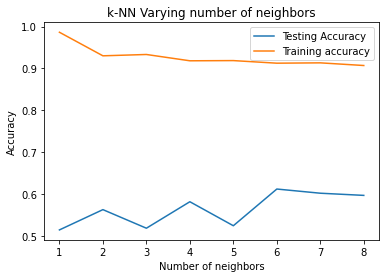

In [73]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Можно увидеть, что при k = 7 точность тестовой выборки самая высокая. Создадим KNeighborsClassifier с числом соседей 7.

In [74]:
knn = KNeighborsClassifier(n_neighbors=6)

In [75]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [76]:
knn.score(X_test,y_test)

0.6121996303142329

### Confusion matrix

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
y_pred = knn.predict(X_test)

In [80]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [81]:
conf_matrix

array([[1404,  274],
       [ 775,  252]], dtype=int64)

In [82]:
print('True negative', conf_matrix[0][0])
print('False positive', conf_matrix[0][1])
print('True positive', conf_matrix[1][0])
print('False negative', conf_matrix[1][1])

True negative 1404
False positive 274
True positive 775
False negative 252


### Classification Report

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.84      0.73      1678
           1       0.48      0.25      0.32      1027

    accuracy                           0.61      2705
   macro avg       0.56      0.54      0.53      2705
weighted avg       0.58      0.61      0.57      2705



In [85]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [86]:
from sklearn.metrics import roc_curve

In [87]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

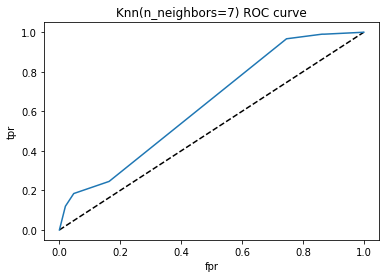

In [88]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [89]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6342361716375386

### Cross Validation

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [92]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [93]:
knn_cv.best_score_

0.8084073713621951

In [94]:
knn_cv.best_params_

{'n_neighbors': 34}